In [3]:
# 1. Import library
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10


# 2. Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_val, y_val = X_train[35000:50000,:], y_train[35000:50000]
X_train, y_train = X_train[:35000,:], y_train[:35000]
# print(X_train.shape)

# 3. Reshape the data set corresponding to the requirement of keras
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
# 5. Define the model
model = Sequential()
 
model.add(Conv2D(64, (3, 3), activation='relu',padding="same",input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu',padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu',padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(256, (3, 3), activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Flatten layer form 
model.add(Flatten())

# Add Fully Connected layer 
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 128)      

In [4]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
               metrics=['accuracy'])

# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=256, epochs=50, verbose=1)

Epoch 1/50
137/137 [==============================] - 51s 151ms/step - loss: 2.2200 - accuracy: 0.1829 - val_loss: 1.8708 - val_accuracy: 0.3267
Epoch 2/50
137/137 [==============================] - 19s 138ms/step - loss: 1.7404 - accuracy: 0.3470 - val_loss: 1.5294 - val_accuracy: 0.4463
Epoch 3/50
137/137 [==============================] - 19s 139ms/step - loss: 1.4931 - accuracy: 0.4521 - val_loss: 1.3257 - val_accuracy: 0.5129
Epoch 4/50
137/137 [==============================] - 19s 138ms/step - loss: 1.3125 - accuracy: 0.5283 - val_loss: 1.1787 - val_accuracy: 0.5776
Epoch 5/50
137/137 [==============================] - 19s 139ms/step - loss: 1.1720 - accuracy: 0.5853 - val_loss: 1.0536 - val_accuracy: 0.6305
Epoch 6/50
137/137 [==============================] - 19s 139ms/step - loss: 1.0589 - accuracy: 0.6290 - val_loss: 1.0153 - val_accuracy: 0.6475
Epoch 7/50
137/137 [==============================] - 19s 139ms/step - loss: 0.9680 - accuracy: 0.6598 - val_loss: 0.9058 - val_ac

[0.672832190990448, 0.8134999871253967]


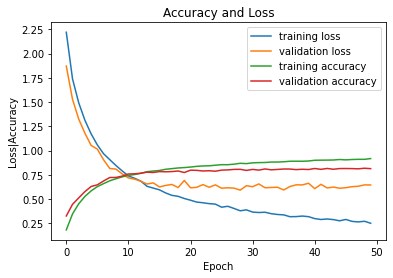

In [5]:
# 8. Plot the graph loss, accuracy of traning set and validation set
fig = plt.figure()
numOfEpoch = 50
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='training accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

# 9. Evaluate the model with test sets
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Predicted:  Ship


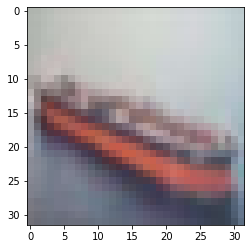

Predicted:  Truck


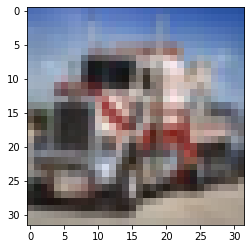

Predicted:  Truck


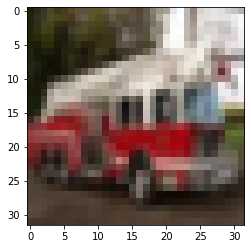

In [6]:
# 10. Predict
A = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

plt.imshow(X_test[999].reshape(32,32,3), cmap='gray')
y_predict = model.predict(X_test[999].reshape(1,32,32,3))
print('Predicted: ', A[np.argmax(y_predict)])
plt.show()

plt.imshow(X_test[285].reshape(32,32,3), cmap='gray')
y_predict = model.predict(X_test[285].reshape(1,32,32,3))
print('Predicted: ', A[np.argmax(y_predict)])
plt.show()

plt.imshow(X_test[350].reshape(32,32,3), cmap='gray')
y_predict = model.predict(X_test[350].reshape(1,32,32,3))
print('Predicted: ', A[np.argmax(y_predict)])
plt.show()
